### Intel Images classification using CNN, VGG, ResNet
This dataset contains images of natural scenes from six categories: buildings, forest, glacier, mountain, sea, and street. It includes 25,000 images, making it ideal for multi-class classification.

This Data contains around 25k images of size 150x150 distributed under 6 categories.
* 'buildings' = 0,
* 'forest' = 1,
* 'glacier' = 2,
* 'mountain' = 3,
* 'sea' = 4,
* 'street' = 5

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.

### Import Library

In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Dropout , Flatten , Activation , BatchNormalization

### Load Data

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:20<00:00, 18.4MB/s]
100% 346M/346M [00:20<00:00, 18.1MB/s]


### Pre-processing

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='reflect',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'seg_train/seg_train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    'seg_train/seg_train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'seg_test/seg_test',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
test_generator.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

### Data Exploration

In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Classes present in datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Classes present in datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


In [8]:
import matplotlib.pyplot as plt

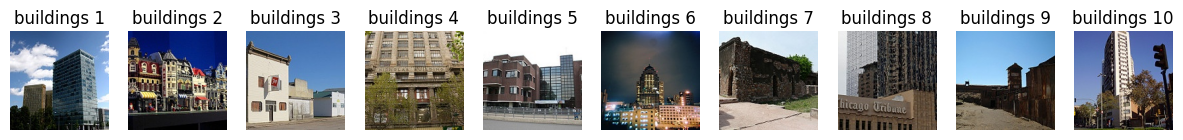

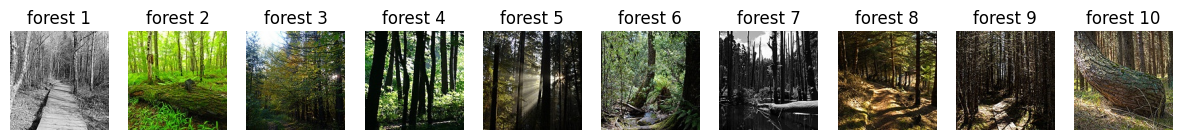

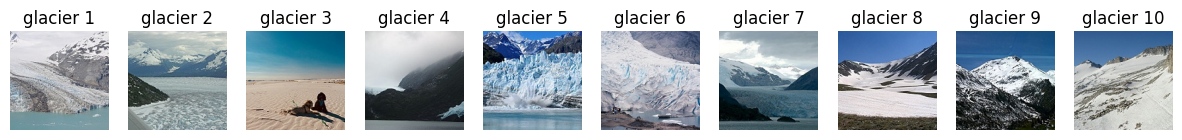

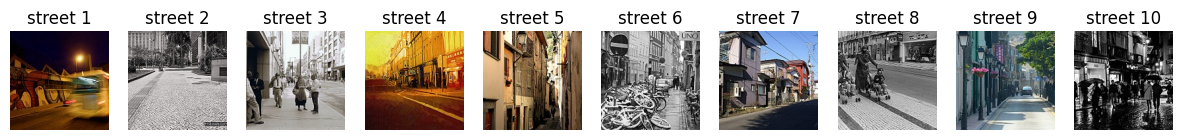

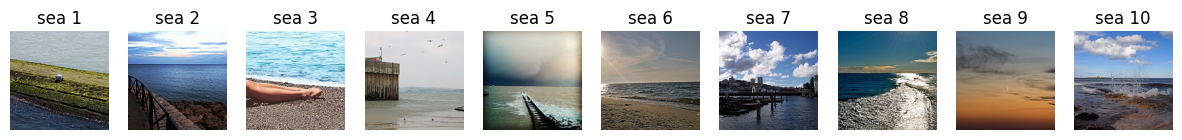

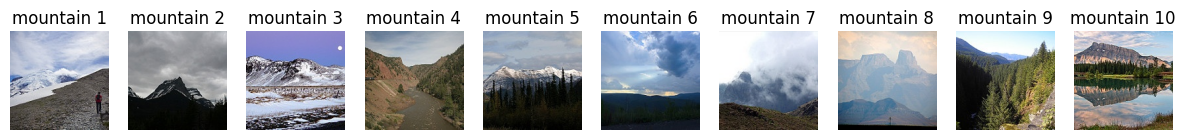

In [9]:
# Function to display images from multiple classes
def display_images_by_class(parent_folder, n_images=10):
    # Get the list of class folders
    class_folders = [f for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]

    for class_folder in class_folders:
        class_path = os.path.join(parent_folder, class_folder)
        images = os.listdir(class_path)[:n_images]
        plt.figure(figsize=(15, 10))
        for i, img_name in enumerate(images):
            img = load_img(os.path.join(class_path, img_name), target_size=(150, 150))
            plt.subplot(1, n_images, i + 1)
            plt.imshow(img)
            plt.title(f"{class_folder} {i+1}")
            plt.axis('off')
        plt.show()

# Path to the parent directory containing class folders
parent_folder = 'seg_train/seg_train'

# Display images for each class in the parent folder
display_images_by_class(parent_folder, n_images=10)

### Create the model

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape = (255,255,3)))
model.add(MaxPooling2D((2,2),strides = 2 ,padding='same' ))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2),strides = 2 ,padding='same' ))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2),strides = 2 ,padding='same' ))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2),strides = 2 ,padding='same' ))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(6,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Summary of model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,274,854 (8.68 MB)

 Trainable params: 2,274,854 (8.68 MB)

 Non-trainable params: 0 (0.00 B)

### Model architecture

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

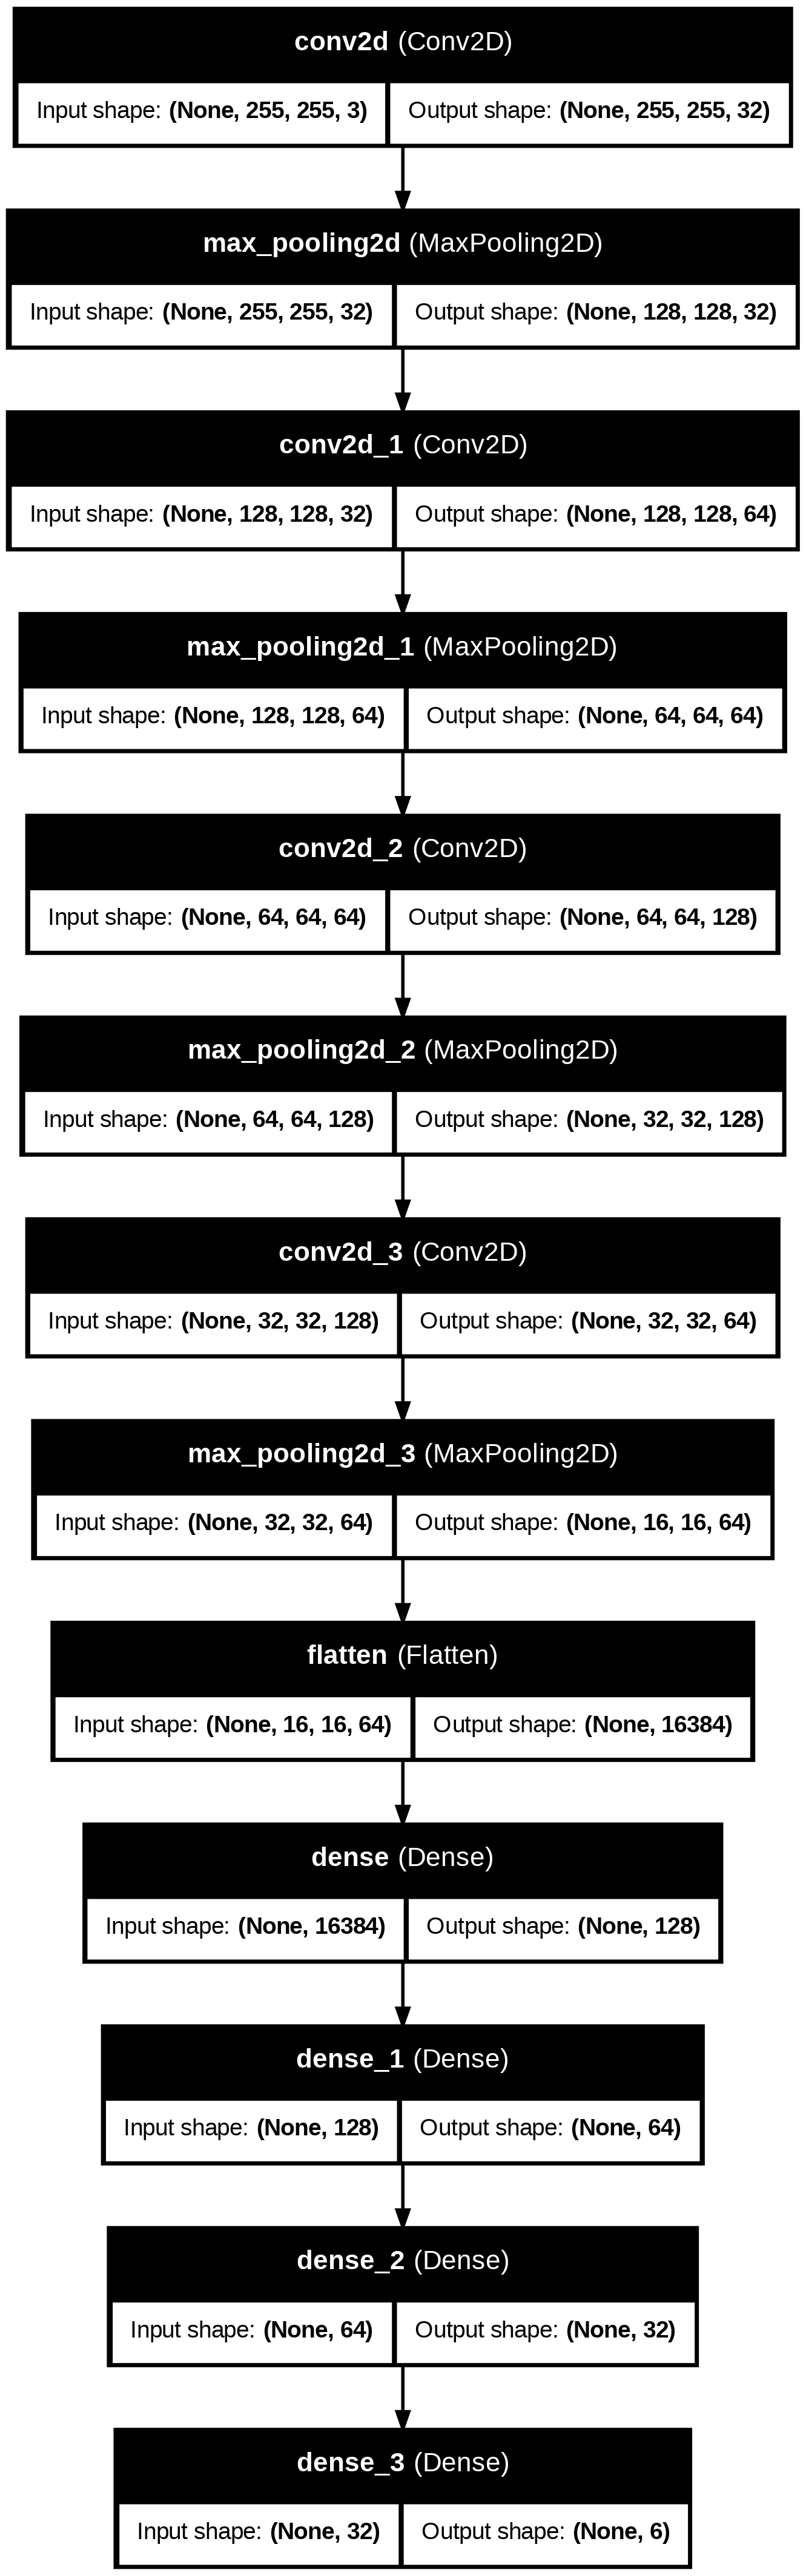

In [ ]:
# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png', width=250, height=600)

### Compile the model

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Train the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau

In [ ]:
ES = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [ ]:
history = model.fit(train_generator,epochs=12,validation_data=val_generator, callbacks=[ES,RL])

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 256s 685ms/step - accuracy: 0.4455 - loss: 1.3323 - val_accuracy: 0.5870 - val_loss: 1.0259 - learning_rate: 0.0010
Epoch 2/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 217s 586ms/step - accuracy: 0.6472 - loss: 0.8844 - val_accuracy: 0.6730 - val_loss: 0.8642 - learning_rate: 0.0010
Epoch 3/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 262s 586ms/step - accuracy: 0.7202 - loss: 0.7356 - val_accuracy: 0.7600 - val_loss: 0.6535 - learning_rate: 0.0010
Epoch 4/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 585ms/step - accuracy: 0.7590 - loss: 0.6604 - val_accuracy: 0.7614 - val_loss: 0.6177 - learning_rate: 0.0010
Epoch 5/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 585ms/step - accuracy: 0.7788 - loss: 0.6055 - val_accuracy: 0.8099 - val_loss: 0.5233 - learning_rate: 0.0010
Epoch 6/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 585ms/step - accuracy: 0.8039 - loss: 0.5397 - val_accuracy: 0.8021 - val_loss: 0.5423 - learning_rate: 0.0010
Epoch 7/12
351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 585ms/step - accuracy: 0.8052 

### Evaluating the model

In [ ]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)

# Print the evaluation results
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8838 - loss: 0.3317
Test Loss: 0.4115733206272125
Test Accuracy: 0.8503333330154419


### Plotting graph

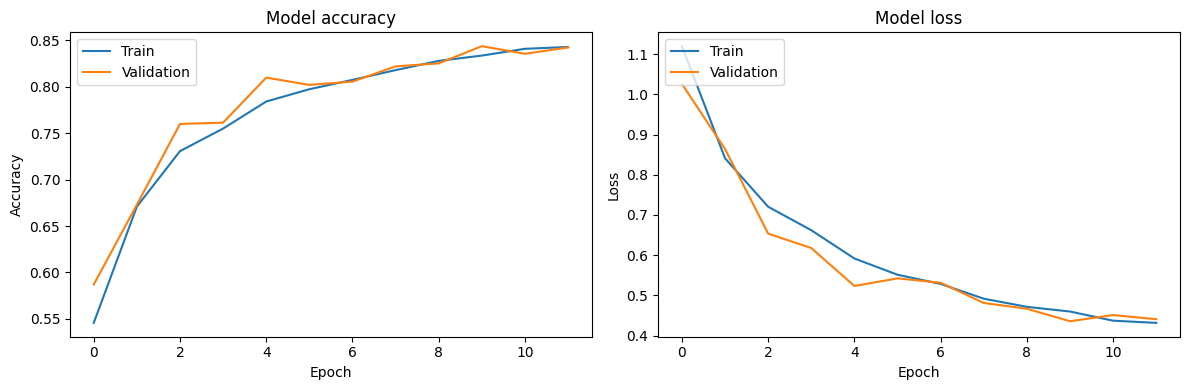

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Model Prediction

In [ ]:
loss,acc = model.evaluate(train_generator,batch_size = 32, verbose = 0)
print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

loss,acc = model.evaluate(test_generator,batch_size = 32, verbose = 0)
print('The accuracy of the model for test data is:',acc*100)
print('The Loss of the model for test data is:',loss)

The accuracy of the model for training data is: 85.1825475692749
The Loss of the model for training data is: 0.4067167043685913
The accuracy of the model for test data is: 85.03333330154419
The Loss of the model for test data is: 0.4115733206272125


In [ ]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step


### Display Some Images With Predictions

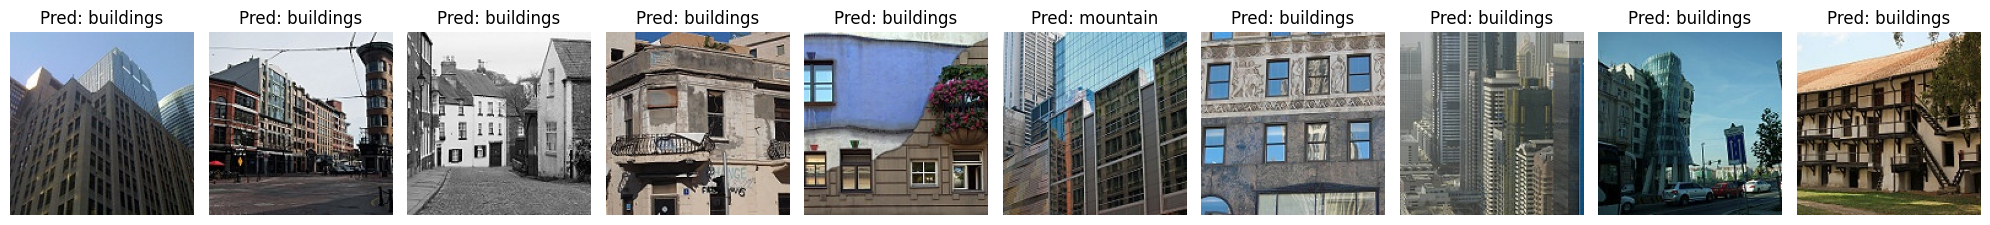

In [ ]:
def display_images_with_predictions(generator, y_pred, num_images_to_display=10):
    # Get the class labels
    labels = {v: k for k, v in generator.class_indices.items()}

    # Get the filenames of the images
    filenames = generator.filenames

    # Create a subplot grid
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))

    for i in range(num_images_to_display):
        # Construct image path
        image_path = os.path.join(generator.directory, filenames[i])
        image = plt.imread(image_path)

        # Get predicted label
        predicted_label_idx = int(y_pred[i])
        predicted_label = labels[predicted_label_idx]

        # Display the image
        axes[i].imshow(image)
        axes[i].set_title(f"Pred: {predicted_label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


# Call the function
display_images_with_predictions(train_generator, y_pred, num_images_to_display=10)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step


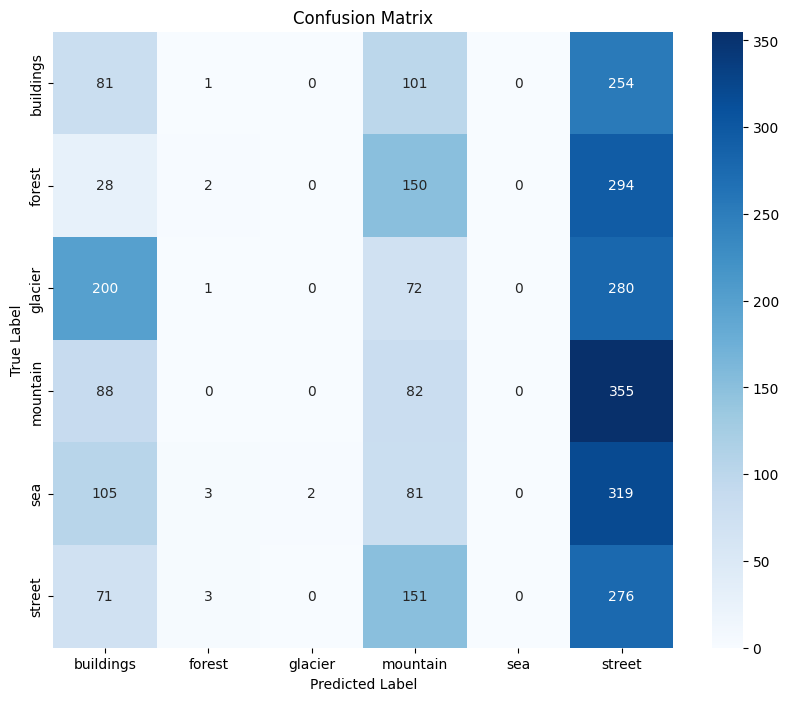

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your true labels and predicted labels
# Replace 'y_true' and 'y_pred' with your actual true and predicted label arrays
y_true = test_generator.classes  # Use this if you're using a generator
y_pred = model.predict(test_generator)  # Assuming 'model' is your trained model
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()